In [1]:
from cifardef import *
from lenet5 import *
from PIL import Image  
import torch,math,os
from torch import nn, optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
PATH='Lenet1.pkl'
model = lenet5(3,10)
if os.path.isfile(PATH):
    model.load_state_dict(torch.load(PATH))
    print(model.eval())
else:
    print('No model')
log=open(PATH.split('.')[0]+'.log','a')
best_acc=0
cuda_gpu = torch.cuda.is_available()
if cuda_gpu:
    model = model.cuda()

No model


In [8]:
batch_size = 128
learning_rate = 0.01
num_epoches = 1000

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  #先四周填充0，在吧图像随机裁剪成32*32
    transforms.RandomHorizontalFlip(),  #图像一半的概率翻转，一半的概率不翻转
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)), #R,G,B每层的归一化用到的均值和方差
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

test_dataset = cifar_10('data/cifar-10-batches-py',
                        train=False, transform=transform_test)
meta=unpickle('data/cifar-10-batches-py/batches.meta')

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_datasetList = [ cifar_10('data/cifar-10-batches-py',
                         train=True, transform=transform_train,index=i+1) for i in range(5)]
train_loaderList=[DataLoader(t, batch_size=batch_size, shuffle=True) for t in train_datasetList]

# 定义loss和optimizer
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=learning_rate)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-4) #优化方式为mini-batch momentum-SGD，并采用L2正则化（权重衰减）


In [4]:
epoch=1

In [9]:
epochs=200

while epoch<=epochs:
    print('Train Epoch: {}/{}:'.format(epoch,epochs))
    for t in train_loaderList:
        train(model,num_epoches,criterion,optimizer,t,log)
    if(epoch%(1)==0):
        acc, loss = test(model, 1, criterion, test_loader,log)
    epoch+=1

torch.save(model.state_dict(),PATH)
log.close()

Train Epoch: 184/200:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 0.433677
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 0.683859
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 0.303434
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 0.440099
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 0.302552

Test set: Average loss: 0.6859, Accuracy: 7627/10000 (76%)
Train Epoch: 185/200:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 0.507158
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 0.673848
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 0.432902
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 0.622138
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 0.184647

Test set: Average loss: 0.6867, Accuracy: 7619/10000 (76%)
Train Epoch: 186/200:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 0.812858
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 0.639951
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 0.596712
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 0.811329
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 0.634158

Tes

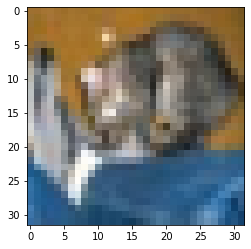

b'cat' , b'cat'


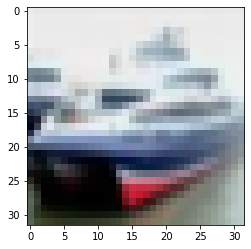

b'ship' , b'ship'


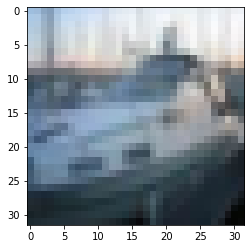

b'automobile' , b'ship'


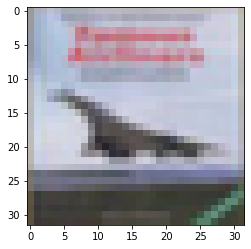

b'airplane' , b'airplane'


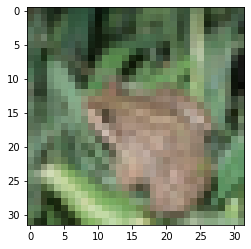

b'frog' , b'frog'


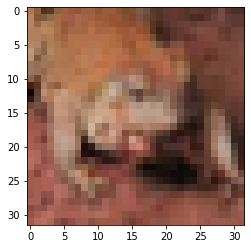

b'frog' , b'frog'


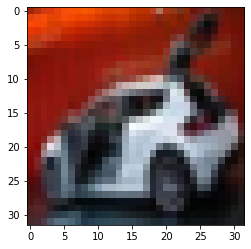

b'automobile' , b'automobile'


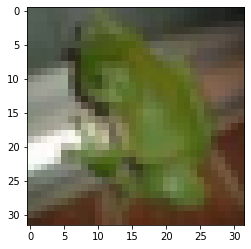

b'bird' , b'frog'


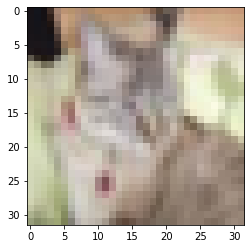

b'cat' , b'cat'


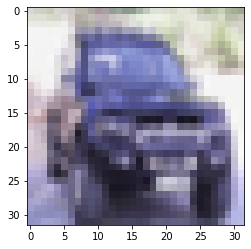

b'automobile' , b'automobile'


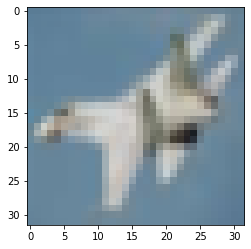

b'airplane' , b'airplane'


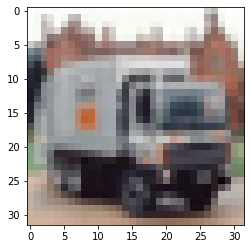

b'truck' , b'truck'


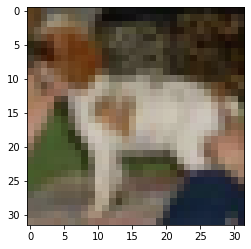

b'dog' , b'dog'


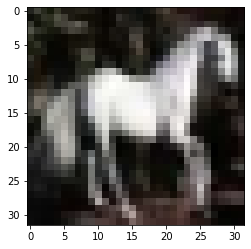

b'horse' , b'horse'


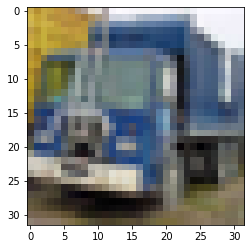

b'truck' , b'truck'


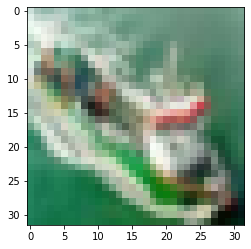

b'ship' , b'ship'


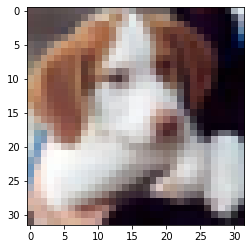

b'dog' , b'dog'


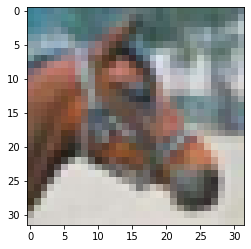

b'horse' , b'horse'


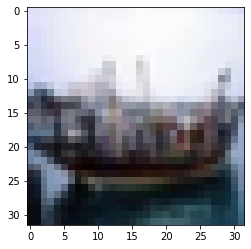

b'ship' , b'ship'


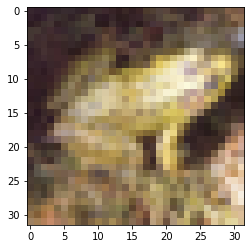

b'frog' , b'frog'


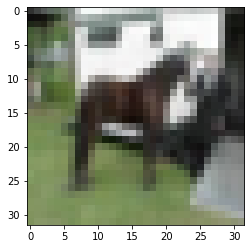

b'horse' , b'horse'


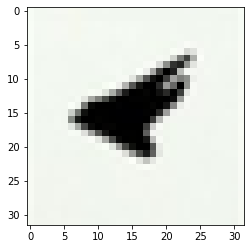

b'airplane' , b'airplane'


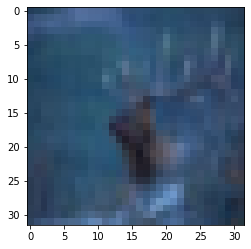

b'bird' , b'deer'


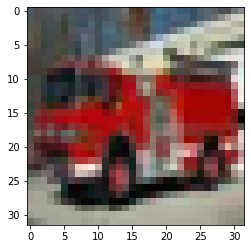

b'truck' , b'truck'


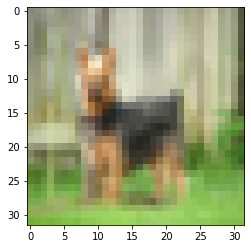

b'deer' , b'dog'


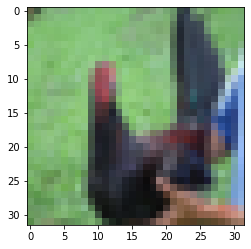

b'deer' , b'bird'


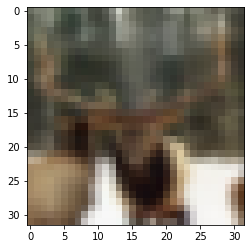

b'bird' , b'deer'


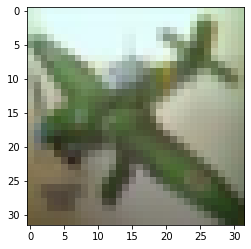

b'bird' , b'airplane'


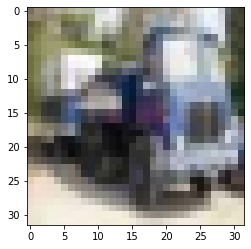

b'truck' , b'truck'


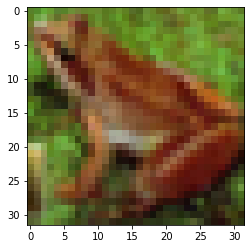

b'frog' , b'frog'


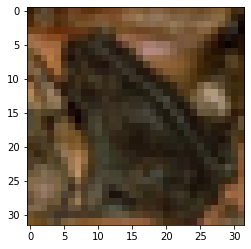

b'frog' , b'frog'


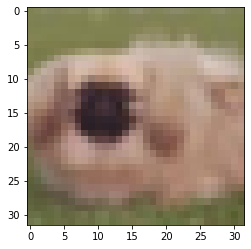

b'dog' , b'dog'


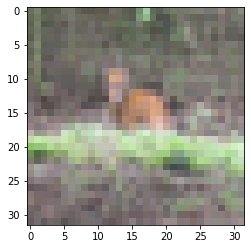

b'deer' , b'deer'


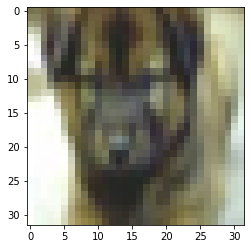

b'dog' , b'dog'


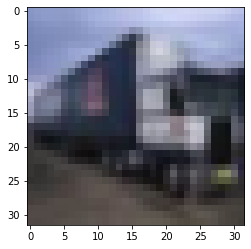

b'truck' , b'truck'


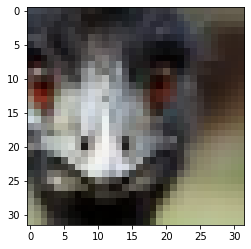

b'cat' , b'bird'


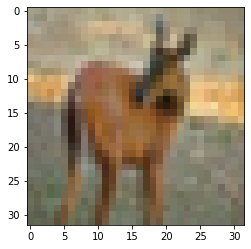

b'deer' , b'deer'


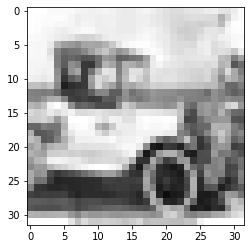

b'truck' , b'automobile'


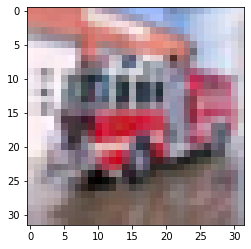

b'truck' , b'truck'


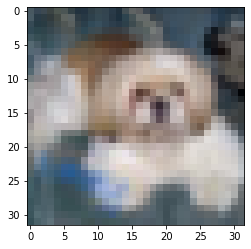

b'dog' , b'dog'


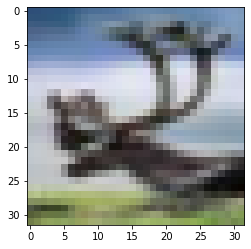

b'airplane' , b'deer'


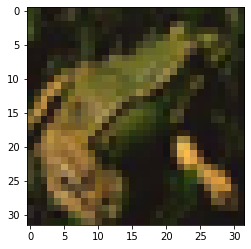

b'frog' , b'frog'


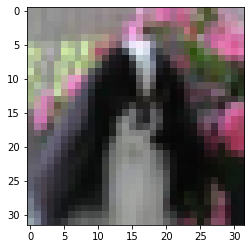

b'cat' , b'dog'


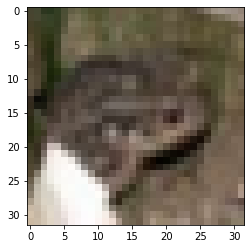

b'frog' , b'frog'


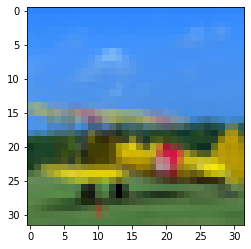

b'airplane' , b'airplane'


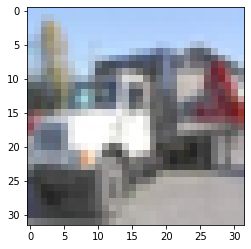

b'truck' , b'truck'


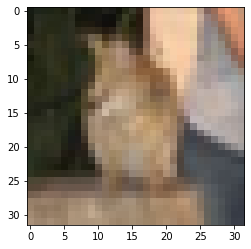

b'dog' , b'cat'


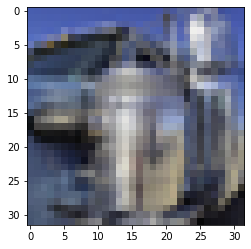

b'horse' , b'truck'


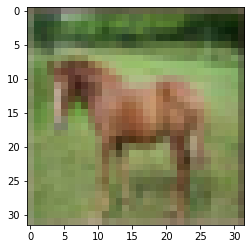

b'deer' , b'horse'


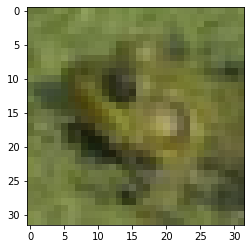

b'frog' , b'frog'


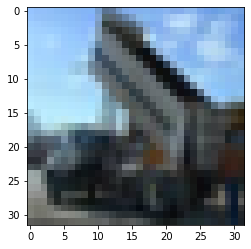

b'truck' , b'truck'


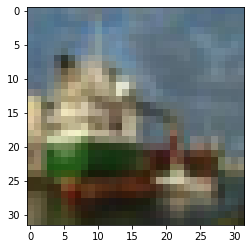

b'ship' , b'ship'


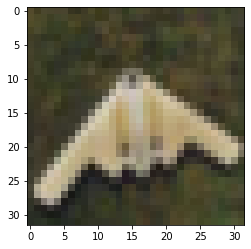

b'frog' , b'airplane'


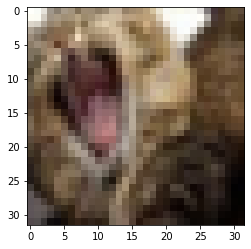

b'frog' , b'cat'


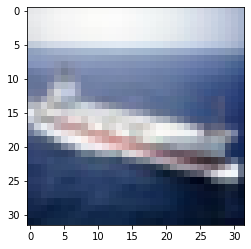

b'ship' , b'ship'


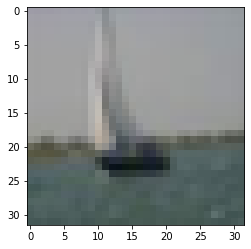

b'ship' , b'ship'


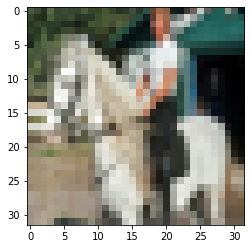

b'horse' , b'horse'


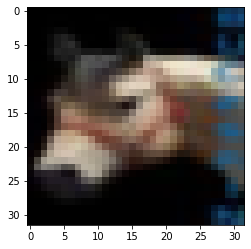

b'dog' , b'horse'


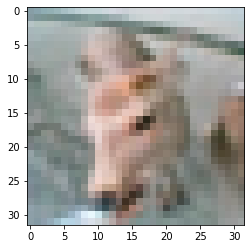

b'bird' , b'deer'


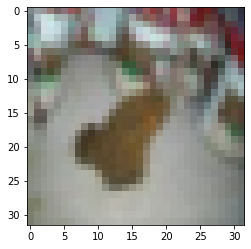

b'cat' , b'frog'


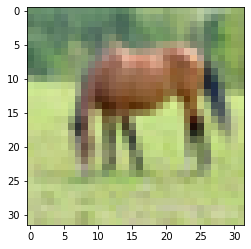

b'horse' , b'horse'


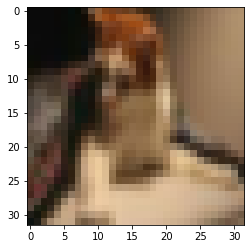

b'dog' , b'cat'


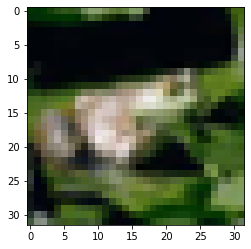

b'frog' , b'frog'


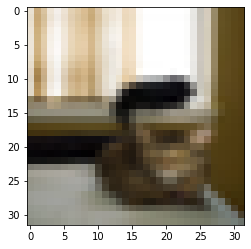

b'airplane' , b'cat'


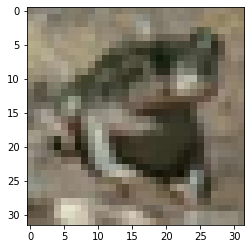

b'frog' , b'frog'


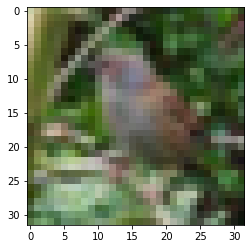

b'bird' , b'bird'


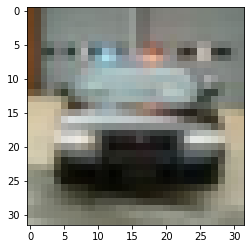

b'automobile' , b'automobile'


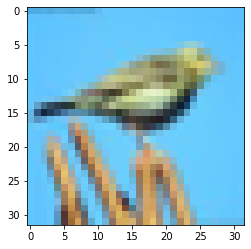

b'bird' , b'bird'


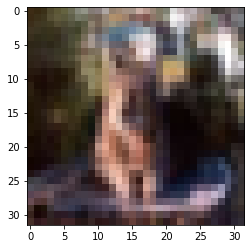

b'dog' , b'cat'


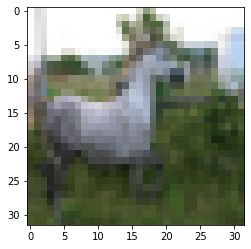

b'bird' , b'horse'


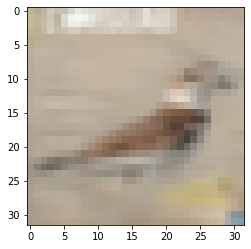

b'airplane' , b'bird'


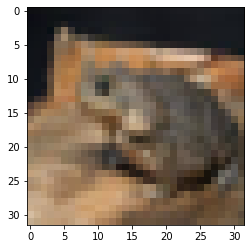

b'frog' , b'frog'


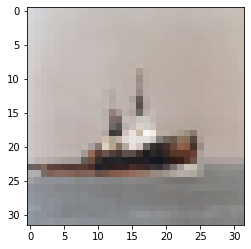

b'ship' , b'ship'


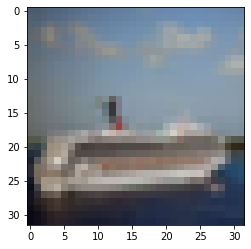

b'ship' , b'ship'


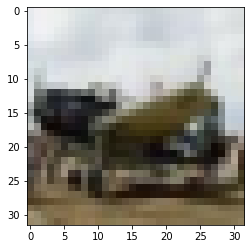

b'frog' , b'airplane'


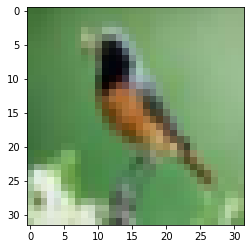

b'bird' , b'bird'


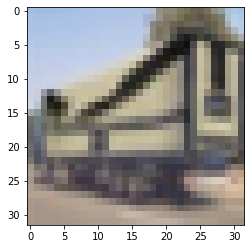

b'airplane' , b'truck'


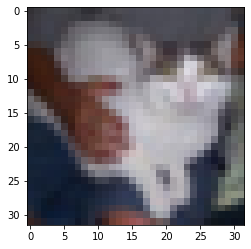

In [ ]:
test_visual(model,'data/cifar-10-batches-py',meta,transform_test)

In [13]:
test(model, 1, nn.CrossEntropyLoss(), test_loader)


Test set: Average loss: 2.3147, Accuracy: 1000/10000 (10%)


(tensor(0.1000), tensor(2.3147, device='cuda:0'))

In [11]:
torch.save(model.state_dict(), PATH)